In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [39]:
df = pd.read_csv('Mall_Customers.csv')

In [40]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
df.shape

(200, 5)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [43]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [45]:
df['Age'].value_counts().head()

Age
32    11
35     9
19     8
31     8
30     7
Name: count, dtype: int64

In [46]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [47]:
data = df['Gender']

In [48]:
number = data.value_counts()

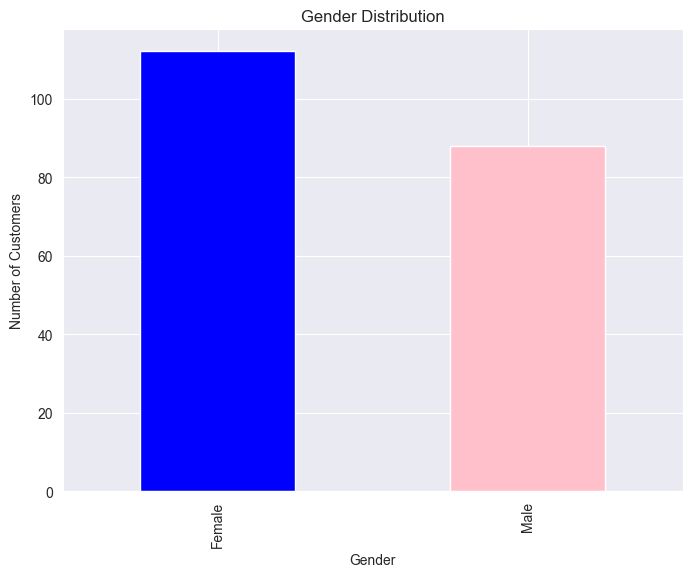

In [49]:
# Plotting the bar plot
plt.figure(figsize=(8, 6))
number.plot(kind='bar', color=['blue', 'pink'])  # Assuming blue for male and pink for female
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

In [50]:
summary_by_gender = df.groupby('Gender')['Spending Score (1-100)'].describe()
print(summary_by_gender)

        count       mean       std  min   25%   50%   75%   max
Gender                                                         
Female  112.0  51.526786  24.11495  5.0  35.0  50.0  73.0  99.0
Male     88.0  48.511364  27.89677  1.0  24.5  50.0  70.0  97.0


<Axes: xlabel='Age'>

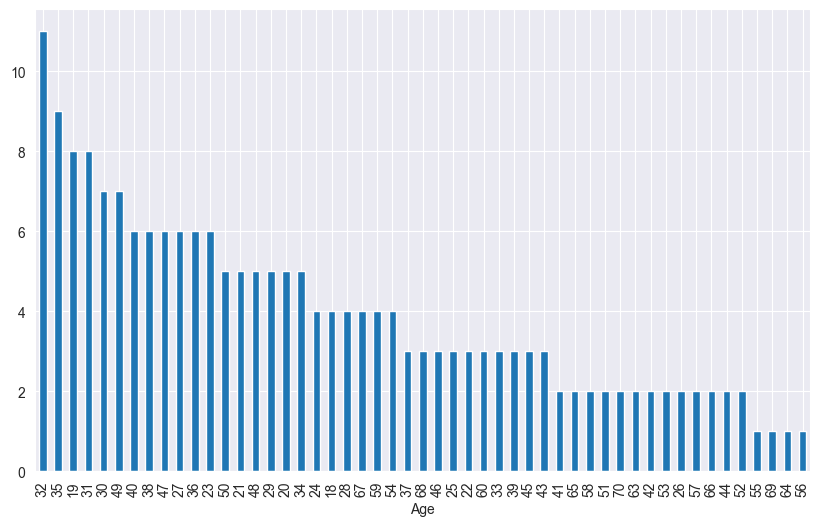

In [51]:
df['Age'].value_counts().sort_values(ascending=False).plot.bar(figsize=(10, 6))

<Axes: title={'center': 'Ages Frequency'}, xlabel='Age', ylabel='Number of Customer'>

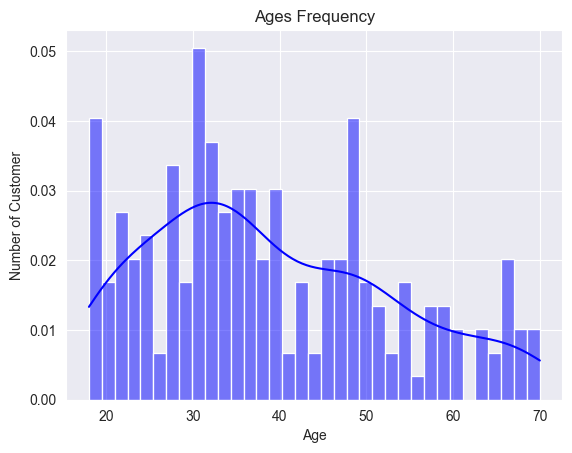

In [52]:
plt.figtsize=(10,6)
plt.title('Ages Frequency')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
sns.histplot(df['Age'],kde = True, stat = 'density',color ='blue', bins = 35)

In [53]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [54]:
labelencoder = LabelEncoder()

for col in df.columns:
    df['Gender'] = labelencoder.fit_transform(df['Gender'])

In [55]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [56]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [57]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [59]:
### Feature selection for the model
#Considering only 2 features (Annual income and Spending Score) and no Label available
X= df[['Annual Income (k$)','Spending Score (1-100)']]

We are using Elbow method to find the best numbers of cluster that could be formed

In [60]:
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

/Users/navinsharma/Desktop/pythonProject1/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/navinsharma/Desktop/pythonProject1/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/navinsharma/Desktop/pythonProject1/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/navinsharma/Desktop/pythonProject1/venv/lib/python3.11/site-packages/

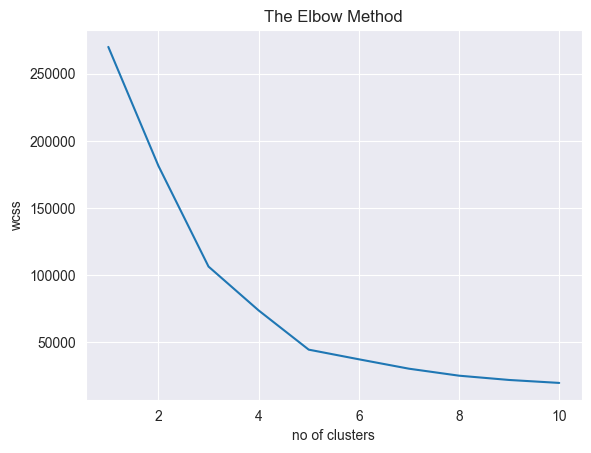

In [61]:
#Visualizing the ELBOW method to get the optimal value of K
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

From above we can see the 5 could be the best number of cluster to be formed for the given columns

In [62]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

/Users/navinsharma/Desktop/pythonProject1/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


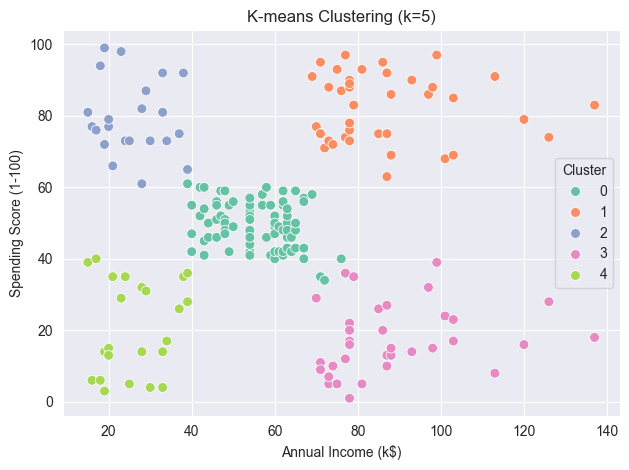

In [63]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Scatter plot with color based on cluster
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set2', s=50)

plt.title(f'K-means Clustering (k=5)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

So, above we can see that there are 5 cluster formed

Cluster 0 (Medium Income, Medium Spending Score):

This group might represent a segment of the population with moderate income levels who spend proportionally on goods and services. They may strike a balance between saving and spending on non-essential items.

Cluster 1 (High Income, High Spending Score):

These customers likely have high disposable incomes and are comfortable spending on both essential and luxury items. They may have a higher affinity for shopping and indulging in non-essential purchases.

Cluster 2 (Low Income, High Spending Score):

Customers in this cluster may be utilizing credit or engaging in behaviors that lead to higher spending despite having a low income. It could indicate impulsive buying or a willingness to take on debt for immediate gratification.

Cluster 3 (High Income, Low Spending Score):

These customers may be conservative in their spending habits despite having a high income. Possible reasons could include a focus on saving, investment, or a lack of interest in discretionary purchases.

Cluster 4 (Low Income, Low Spending Score):

Customers in this cluster may have limited financial resources, leading to a lower spending score. They might prioritize essential expenses and be more cautious about discretionary spending.

/var/folders/w_/kmnf_nms25g_b6xl323x78rr0000gn/T/ipykernel_29636/1868353462.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Cluster', y='Annual Income (k$)', data=df, palette='Set2',ax=ax)


Text(0.5, 1.0, 'Cluster According to Annual Income')

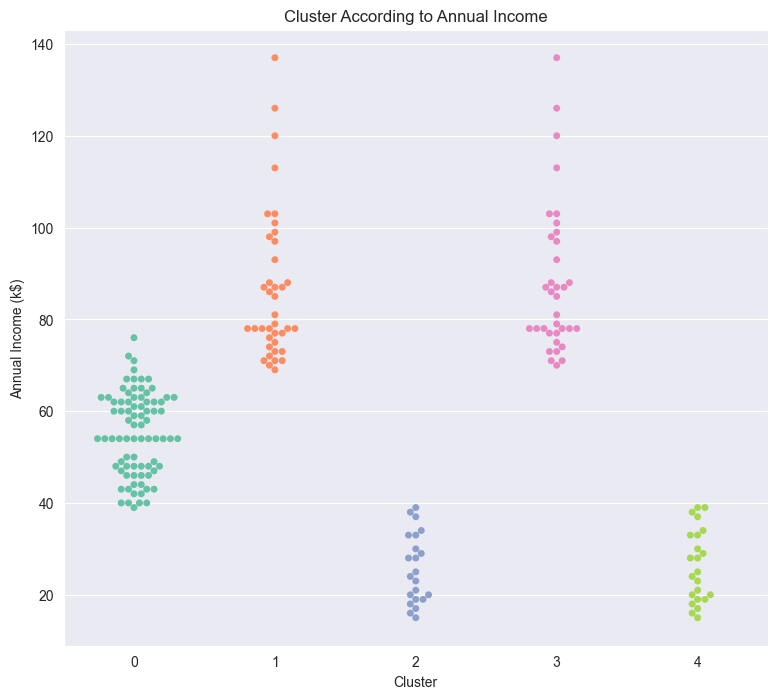

In [64]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Cluster', y='Annual Income (k$)', data=df, palette='Set2',ax=ax)
ax.set_title('Cluster According to Annual Income')

In [65]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster'],
      dtype='object')

In [66]:
X = df[['Age', 'Spending Score (1-100)']]

In [67]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

/Users/navinsharma/Desktop/pythonProject1/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/navinsharma/Desktop/pythonProject1/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/navinsharma/Desktop/pythonProject1/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/navinsharma/Desktop/pythonProject1/venv/lib/python3.11/site-packages/

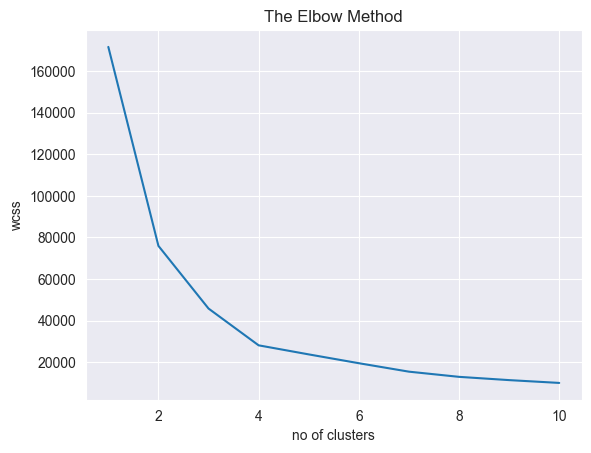

In [68]:
#Visualizing the ELBOW method to get the optimal value of K
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

/Users/navinsharma/Desktop/pythonProject1/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


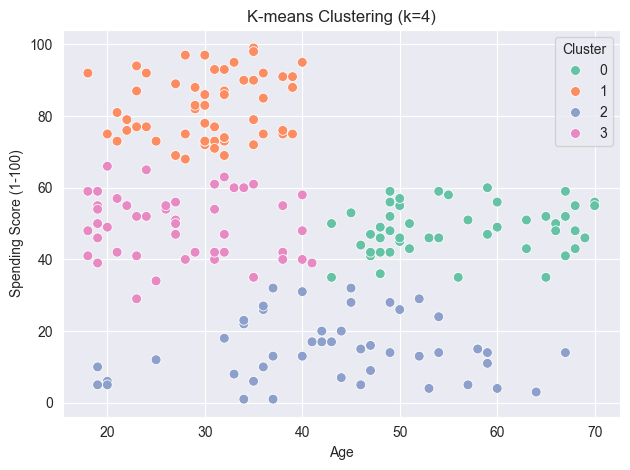

In [69]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Scatter plot with color based on cluster
sns.scatterplot(x='Age',y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set2', s=50)

plt.title(f'K-means Clustering (k=4)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

Cluster 1 (Age 20-40, High Spending Score):

Higher Disposable Income: Individuals in this age group might be in the early stages of their careers, experiencing a rise in income. As a result, they may have higher disposable income for discretionary spending.
Lifestyle and Trends: Younger individuals may be more inclined to spend on fashion, technology, entertainment, and experiences, contributing to a higher spending score.
Social Influences: Peer pressure and social trends might encourage spending on items associated with a modern lifestyle.

Cluster 0 (Age 42-70, Medium Spending Score):

Stable Financial Situation: Individuals in this age group may have more stable financial situations, leading to a balanced approach to spending.
Prioritizing Savings: Older individuals might prioritize savings for retirement, healthcare, or other future expenses, resulting in a medium spending score.
Family Responsibilities: Spending patterns may be influenced by family responsibilities, such as supporting children or saving for educational expenses.

Variability in Spending Score (Age 20-70):

Diverse Preferences: People of different ages may have diverse preferences and priorities when it comes to spending, leading to variability in spending scores.
Life Stage Considerations: Individuals in their 20s may focus on establishing themselves, while those in their 40s and 50s may be supporting families or investing in homeownership.
Economic Factors: Economic conditions, job stability, and regional variations can impact spending patterns across age groups.

In [70]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,1
2,3,0,20,16,6,2
3,4,0,23,16,77,1
4,5,0,31,17,40,3


/var/folders/w_/kmnf_nms25g_b6xl323x78rr0000gn/T/ipykernel_29636/1985881340.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Cluster', y='Spending Score (1-100)', data=df,palette='Set2')


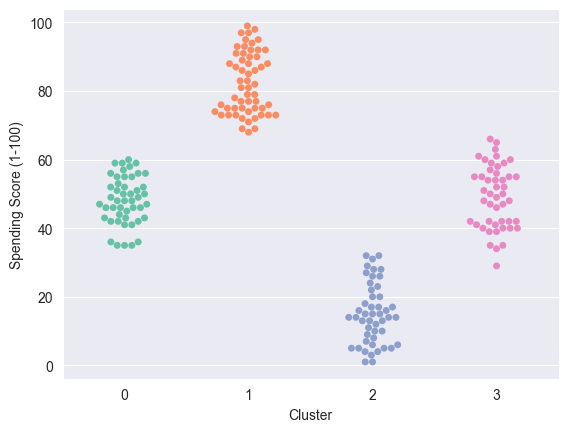

In [71]:
sns.swarmplot(x='Cluster', y='Spending Score (1-100)', data=df,palette='Set2')
ax.set_title('Cluster According to Scoring History')

plt.show()